In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import sys
import os
import logging
import galsim
import cmath as cm
import math
import random
import scipy
from scipy.stats import norm
from astropy.io import fits
from astropy.cosmology import WMAP9 as cosmo
%matplotlib inline

Using TensorFlow backend.


# Parameters to fix

In [2]:
# Parameters
phys_stamp_size = 6.4 # arcsec
pixel_scale_euclid_vis = 0.1 # arcsec/pixel

stamp_size = int(phys_stamp_size/pixel_scale_euclid_vis)

# Loading catalog

In [131]:
cosmos_cat = galsim.COSMOSCatalog('real_galaxy_catalog_25.2.fits', dir='/sps/lsst/users/barcelin/COSMOS_25.2_training_sample')

In [90]:
cosmos_cat.nobjects

81499

In [92]:
im_size = 64
pix_scale = 0.05

In [149]:
gal = cosmos_cat.makeGalaxy(np.random.randint(cosmos_cat.nobjects), gal_type='real', 
                            noise_pad_size = im_size*pix_scale)#chromatic=True, 

In [150]:
PSF_lsst = galsim.Moffat(fwhm=0.1, beta = 2)
bdfinal = galsim.Convolve(gal, PSF_lsst)

In [151]:
im_real = galsim.Image(im_size, im_size)
bdfinal.drawImage(image=im_real, scale=pix_scale)

galsim.Image(bounds=galsim.BoundsI(xmin=1, xmax=64, ymin=1, ymax=64), array=
array([[ 6.6265627e-03,  5.6183292e-03,  2.8719534e-03, ...,
        -2.9174469e-03,  1.1283410e-02, -2.1467074e-03],
       [ 7.2236733e-05,  8.0982074e-03, -6.8199639e-03, ...,
        -5.5348859e-03,  6.5846187e-03, -3.5258338e-03],
       [-1.4629229e-03,  2.8412081e-03,  1.4197902e-02, ...,
         1.4710189e-03, -1.3678306e-02,  2.8694214e-03],
       ...,
       [ 1.3242126e-03,  4.3368503e-03,  6.3206959e-03, ...,
         4.2118523e-03, -3.1708551e-03, -5.6931740e-03],
       [ 3.6117304e-03,  1.0483995e-02,  1.2960198e-02, ...,
        -7.3746336e-03,  1.0860958e-02, -3.9529945e-03],
       [-2.9532642e-03,  6.9615128e-03,  3.4746309e-03, ...,
        -7.2588753e-03, -5.9945215e-03,  1.2812410e-03]], dtype=float32), wcs=galsim.PixelScale(0.05))

In [152]:
im_real.array.data.shape

(64, 64)

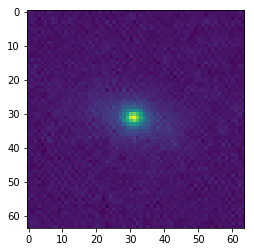

In [153]:
plt.imshow(im_real.array.data)

In [9]:
gal.gsparams

galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05)

In [137]:
im_size = 64
pix_scale = 0.05
bp_file = os.path.join(galsim.meta_data.share_dir, 'wfc_F814W.dat.gz')
bandpass = galsim.Bandpass(bp_file, wave_type='ang').thin().withZeropoint(25.94)
psf = galsim.OpticalPSF(diam=2.4, lam=1000.) # bigger than HST F814W PSF.
indices = np.arange(100)
real_gal_list = cosmos_cat.makeGalaxy(indices, gal_type='real',
                                    noise_pad_size=im_size*pix_scale)
param_gal_list = cosmos_cat.makeGalaxy(indices, gal_type='parametric', chromatic=True)

real_gal_list_array = []
param_gal_list_array = []
for ind in indices:
    real_gal = galsim.Convolve(real_gal_list[ind], PSF_lsst)#psf
    param_gal = galsim.Convolve(param_gal_list[ind], PSF_lsst)#psf
    im_real = galsim.Image(im_size, im_size)
    im_param = galsim.Image(im_size, im_size)
    real_gal.drawImage(image=im_real, scale=pix_scale)
    real_gal_list_array.append(im_real.array.data)
    param_gal.drawImage(bandpass, image=im_param, scale=pix_scale)
    param_gal_list_array.append(im_param.array.data)

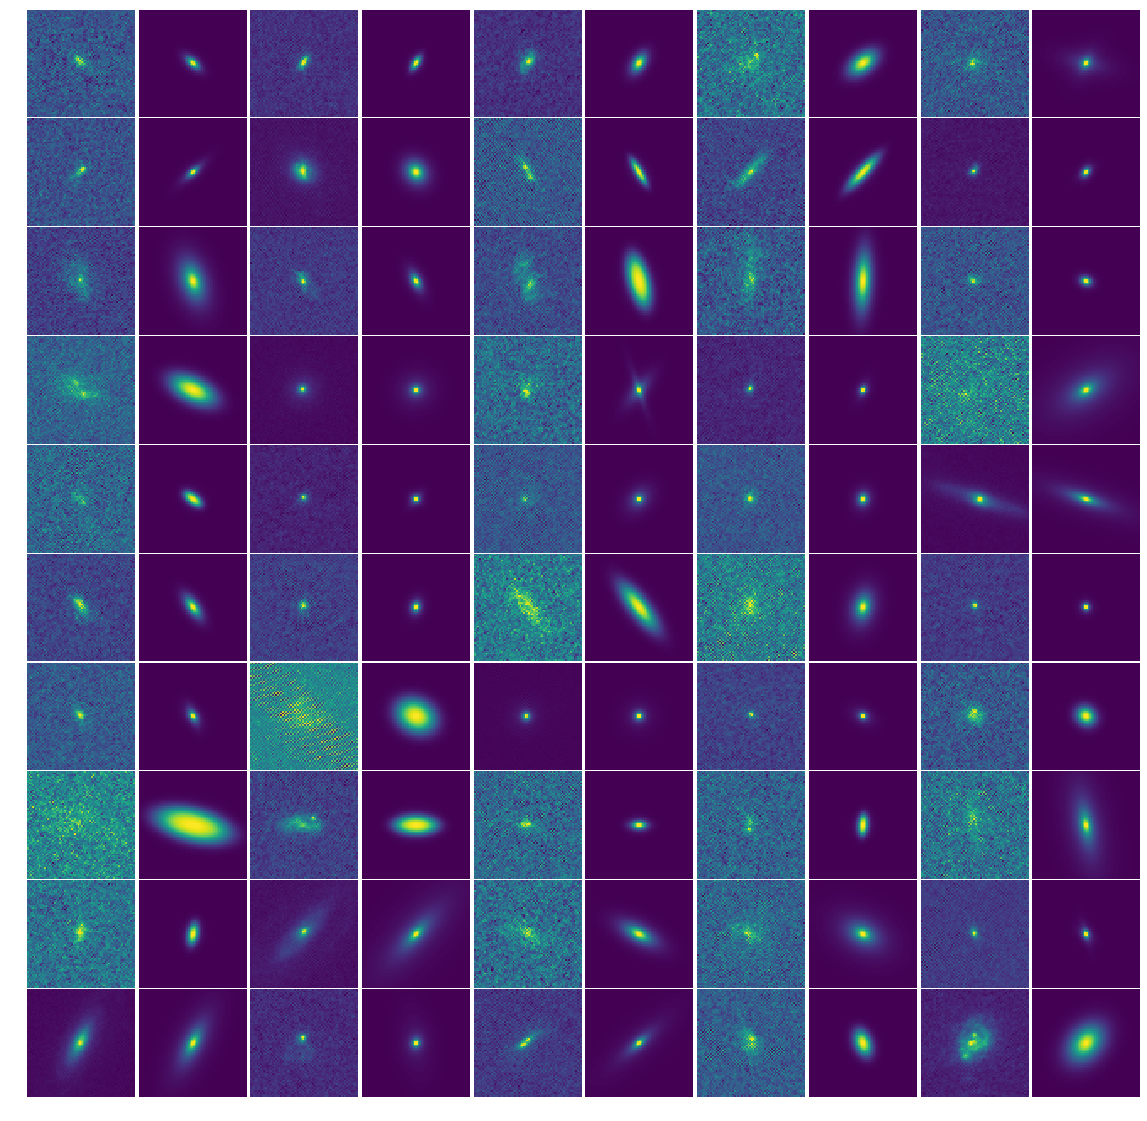

In [138]:
N_plot = 10
fig, axes = plt.subplots(N_plot, N_plot, figsize=(20, 20))
fig.subplots_adjust(wspace=.01, hspace=.01)

indices = np.random.choice(100, size=N_plot*N_plot, replace=False)

for i in range(N_plot):
    for j in range(0,N_plot ,2):
        axes[i,j].imshow(real_gal_list_array[i+N_plot*j])#
        axes[i,j].axis('off')
        axes[i,j+1].imshow(param_gal_list_array[i+N_plot*j])#
        axes[i,j+1].axis('off')

(-0.5, 63.5, 63.5, -0.5)

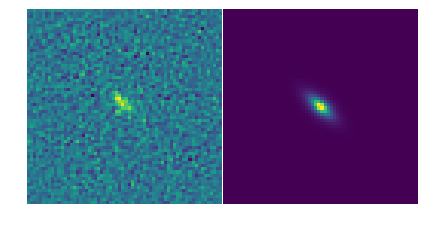

In [117]:
N_plot = 1
fig, axes = plt.subplots(N_plot, N_plot*2, figsize=(7, 7))
fig.subplots_adjust(wspace=.01, hspace=.01)

indices = np.random.choice(100, size=N_plot*N_plot, replace=False)


axes[0].imshow(im_real.array.data)
axes[0].axis('off')
axes[0+1].imshow(im_param.array.data)
axes[0+1].axis('off')
#for i in range(N_plot):
#    for j in range(N_plot, 2):
#        axes[i,j].imshow(im_real.array.data.shape)
#        axes[i,j].axis('off')
#        axes[i,j+1].imshow(im_param.array.data.shape)
#        axes[i,j+1].axis('off')

In [ ]:
im_size = 64
pix_scale = 0.05
#bp_file = os.path.join(galsim.meta_data.share_dir, 'wfc_F814W.dat.gz')
#bandpass = galsim.Bandpass(bp_file, wave_type='ang').thin().withZeropoint(25.94)
#cosmos_cat = galsim.COSMOSCatalog()
psf = galsim.OpticalPSF(diam=2.4, lam=1000.) # bigger than HST F814W PSF.
indices = np.arange(100)
real_gal_list = cosmos_cat.makeGalaxy(indices, gal_type='real',
                                    noise_pad_size=im_size*pix_scale)
#param_gal_list = cosmos_cat.makeGalaxy(indices, gal_type='parametric', chromatic=True)

real_gal_list_array = []
for ind in indices:
    real_gal = galsim.Convolve(real_gal_list[ind], psf)
    #param_gal = galsim.Convolve(param_gal_list[ind], psf)
    im_real = galsim.Image(im_size, im_size)
    #im_param = galsim.Image(im_size, im_size)
    real_gal.drawImage(image=im_real, scale=pix_scale)
    real_gal_list_array.append(im_real.array.data)
    #param_gal.drawImage(bandpass, image=im_param, scale=pix_scale)

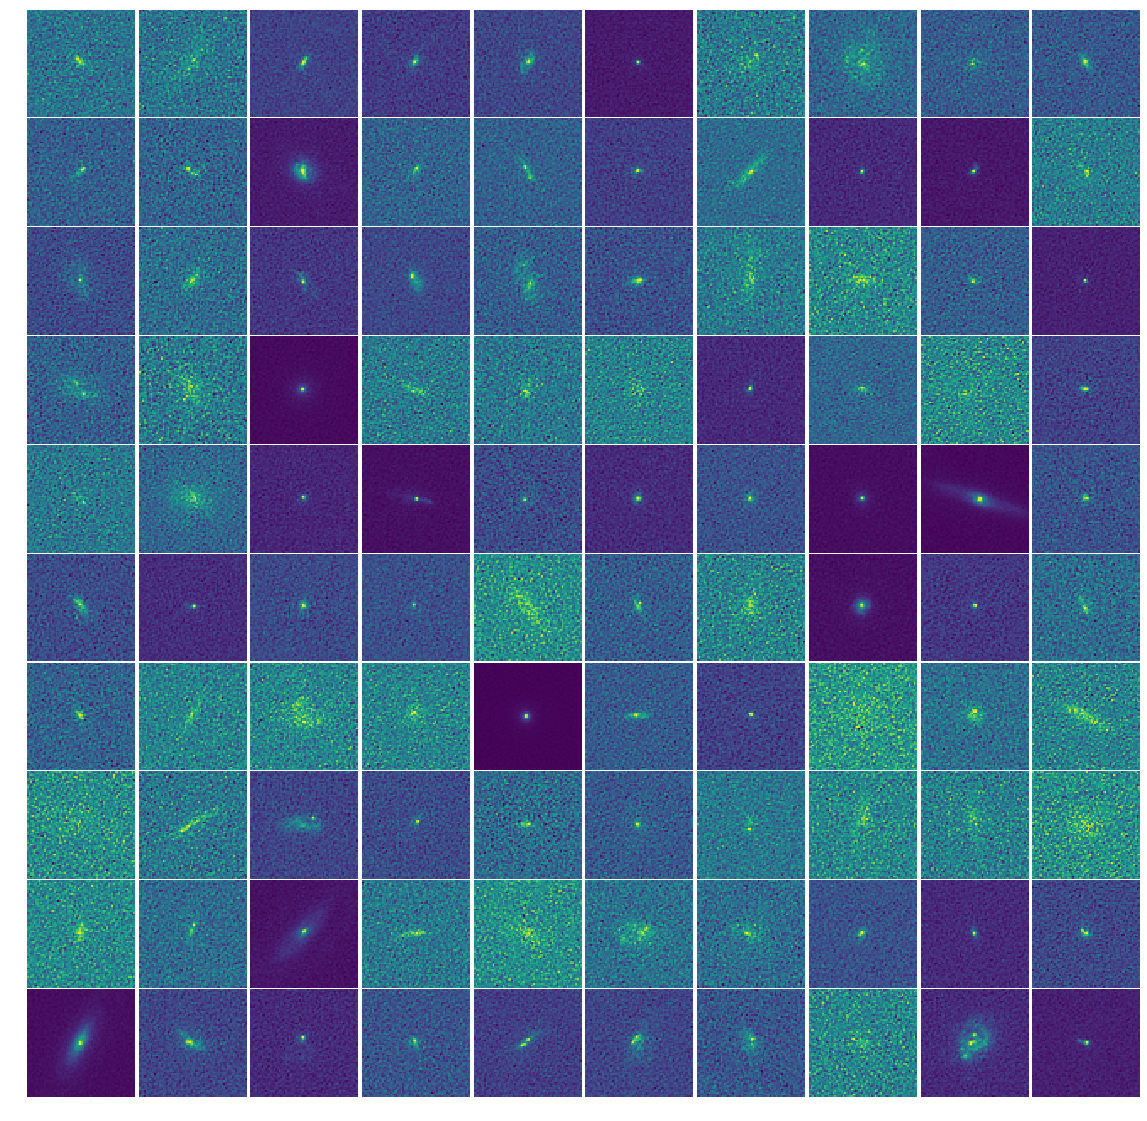

In [124]:
N_plot = 10
fig, axes = plt.subplots(N_plot, N_plot, figsize=(20, 20))
fig.subplots_adjust(wspace=.01, hspace=.01)

indices = np.random.choice(100, size=N_plot*N_plot, replace=False)

for i in range(N_plot):
    for j in range(N_plot):
        axes[i,j].imshow(real_gal_list_array[i+N_plot*j])#
        axes[i,j].axis('off')